# CESAR cipher

## About 

It is a type of substitution cipher in which each letter in the plaintext is replaced by a letter some fixed number of positions down the alphabet 

For example, with a left shift of 3, D would be replaced by A, E would become B, and so on

*Source: [Wikipedia: Caesar cipher](en.wikipedia.org/wiki/Caesar_cipher)*

## Import modules

In [1]:
import json

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Help-functions with descriptions

In [2]:
# remove non-abc-symbol
def rem(words):
    words_list = list(words.keys())
    
    words = {}
    
    for word in words_list:
        if '-' in word:
            words_list.remove(word)
        else:
            words[word] = 1
    
    return words
    
    
# word to cesar-word
def cesar(word, abc, abc_len, step=3):
    word_list = list(word)
    result = []

    for w in word_list:
        i = abc.index(w)
        i = (i+step) % abc_len
        wn = abc[i]
        result.append(wn)

    result = ''.join(result)
    return result


# convert dict {'word': 1} to dict {'word': 'cesar-word'}
def cesar_all(words, abc, abc_len, step=3):
    result = words
    
    for w in result:
        result[w] = cesar(w, abc, abc_len, step=step)
    
    return result


# check all words loop
def check_all(words_cesar, min_len=0):
    words_keys = words_cesar.keys()
    words_result = {}
    
    for word in words_keys:
        if words_cesar[word] in words_keys:
            if len(word) >= min_len:
                words_result[word] = words_cesar[word]
            
    return words_result


# all steps loop
def loop_all(words, abc, abc_len, min_len=5):
    result = {}
    
    for istep in range(1, abc_len):
        words_rem = rem(words)
        words_cesar = cesar_all(words_rem, abc, abc_len, step=istep)
        words_result = check_all(words_cesar, min_len=min_len)
        
        result[istep] = words_result
        print('DONE: {}'.format(istep))
        
    return result

# for color plot
def img_plot(result):
    lengths = []

    for k in result.keys():
        l = len(result[k].keys())
        lengths.append(l)

    lengths = np.reshape(lengths, (5,5))
    display(lengths)
    
    plt.figure(figsize=(20,10))
    plt.imshow(lengths, interpolation='sinc')
    plt.colorbar()
    plt.show()

## Load and check length of dictionary

In [3]:
words = json.load(open('words_dictionary.json', 'r'))
len(words.keys())

370101

## Make ABC vars

In [4]:
abc = list('abcdefghijklmnopqrstuvwxyz')
abc_len = len(abc)

## Let's do clear CESAR cipher 
### step = 3

In [5]:
words_rem = rem(words)
words_cesar = cesar_all(words_rem, abc, abc_len, step=3)

In [6]:
words_result = check_all(words_cesar, min_len=5)
words_result

{'abime': 'delph',
 'biabo': 'elder',
 'bifer': 'elihu',
 'cobra': 'freud',
 'colob': 'frore',
 'oxime': 'ralph',
 'pelta': 'showd',
 'primero': 'sulphur',
 'teloi': 'whorl',
 'xerox': 'ahura'}

## Loop for all steps
### steps count is 25

In [7]:
result = loop_all(words, abc, abc_len, min_len=5)

DONE: 1
DONE: 2
DONE: 3
DONE: 4
DONE: 5
DONE: 6
DONE: 7
DONE: 8
DONE: 9
DONE: 10
DONE: 11
DONE: 12
DONE: 13
DONE: 14
DONE: 15
DONE: 16
DONE: 17
DONE: 18
DONE: 19
DONE: 20
DONE: 21
DONE: 22
DONE: 23
DONE: 24
DONE: 25


## Save result

In [8]:
json.dump(result, open('result.json', 'w'))

## Final plot

array([[ 12,   5,  10,  41,   4],
       [116,  23,  18,  20,  29],
       [ 18,  15,  56,  15,  18],
       [ 29,  20,  18,  23, 116],
       [  4,  41,  10,   5,  12]])

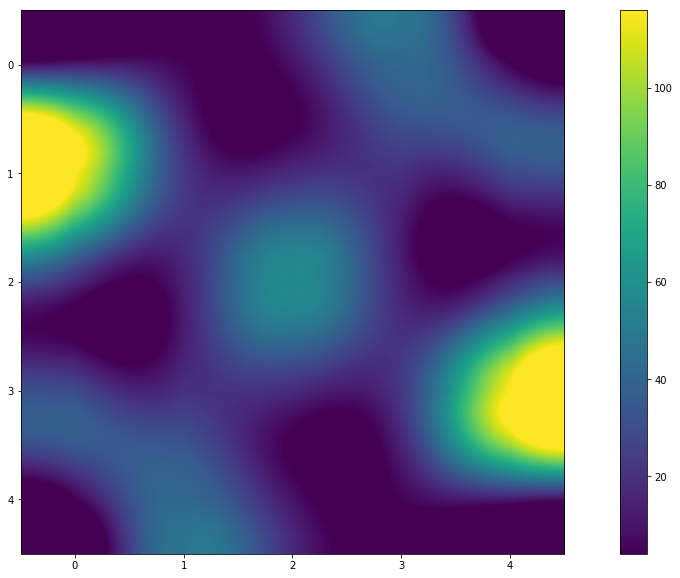

In [9]:
img_plot(result)